In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
df=pd.read_csv("train.csv")

In [1]:
df.shape

NameError: name 'df' is not defined

In [5]:
df.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,1.000009e+18,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,2,15706,320,50,1722,0,35,-1,79
1,1.000017e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
2,1.000037e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
3,1.000064e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15706,320,50,1722,0,35,100084,79
4,1.000068e+19,0,14102100,1005,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,...,1,0,18993,320,50,2161,0,35,-1,157


### Converting  hour column to datetime datatype

In [6]:
df['hour'] = pd.to_datetime(df['hour'], format="%y%m%d%H")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40428967 entries, 0 to 40428966
Data columns (total 24 columns):
 #   Column            Dtype         
---  ------            -----         
 0   id                float64       
 1   click             int64         
 2   hour              datetime64[ns]
 3   C1                int64         
 4   banner_pos        int64         
 5   site_id           object        
 6   site_domain       object        
 7   site_category     object        
 8   app_id            object        
 9   app_domain        object        
 10  app_category      object        
 11  device_id         object        
 12  device_ip         object        
 13  device_model      object        
 14  device_type       int64         
 15  device_conn_type  int64         
 16  C14               int64         
 17  C15               int64         
 18  C16               int64         
 19  C17               int64         
 20  C18               int64         
 21  C19   

In [8]:
list(df.columns)

['id',
 'click',
 'hour',
 'C1',
 'banner_pos',
 'site_id',
 'site_domain',
 'site_category',
 'app_id',
 'app_domain',
 'app_category',
 'device_id',
 'device_ip',
 'device_model',
 'device_type',
 'device_conn_type',
 'C14',
 'C15',
 'C16',
 'C17',
 'C18',
 'C19',
 'C20',
 'C21']

## Click count

In [9]:
df.click.value_counts()

0    33563901
1     6865066
Name: click, dtype: int64

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

[Text(0.5, 1.0, 'Click count')]

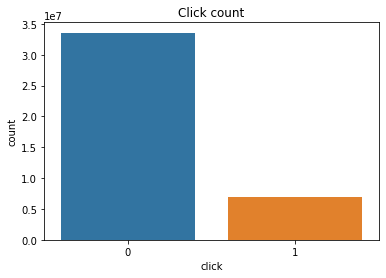

In [11]:
sns.countplot(x=df.click).set(title="Click count")


### Click Through Rate

In [12]:
df.click.value_counts()/len(df)

0    0.830194
1    0.169806
Name: click, dtype: float64

CTR = 17%

#### Clicked = 17%(Approx)
#### Not clicked = 83%(Approx)

# Click to non-click ratio

In [13]:
6865066/33563901

0.20453719011982546

## Clicks across days

Text(0.5, 1.0, 'Clicks across dates')

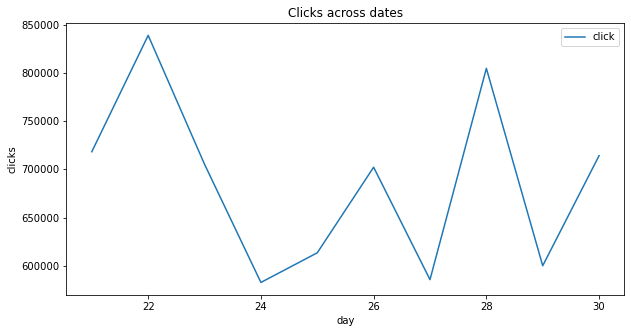

In [14]:
df['day'] = df.hour.apply(lambda x: x.day)
df.groupby('day').agg({'click':'sum'}).plot(figsize=(10,5))
plt.ylabel('clicks')
plt.title('Clicks across dates')

## Clicks done hourwise

Text(0.5, 1.0, 'clicks done by hour(daywise)')

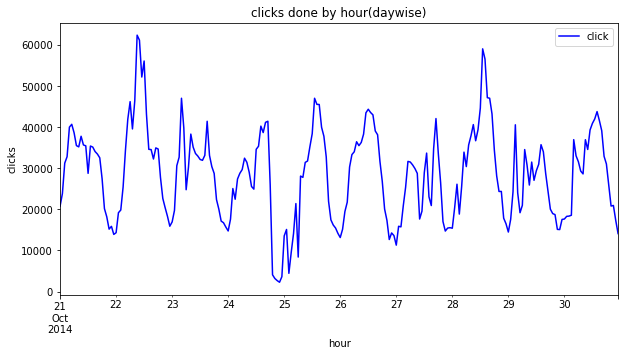

In [15]:
df.groupby('hour').agg({'click':'sum'}).plot(figsize=(10,5), color='Blue')
plt.ylabel('clicks')
plt.title('clicks done by hour(daywise)')

Text(0.5, 1.0, 'clicks per hour(Total)')

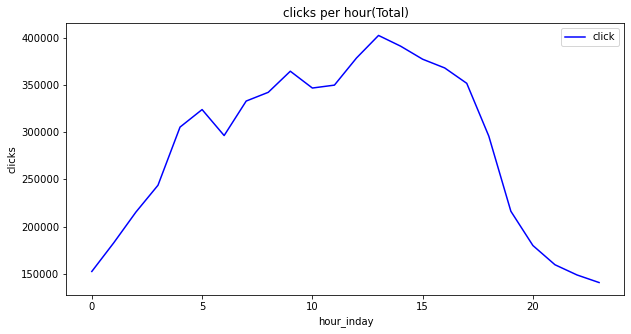

In [16]:
df['hour_inday'] = df.hour.apply(lambda x: x.hour)
df.groupby('hour_inday').agg({'click':'sum'}).plot(figsize=(10,5),color='Blue')
plt.ylabel('clicks')
plt.title('clicks per hour(Total)')

## Site category vs click

Text(0.5, 1.0, 'Site category vs Click')

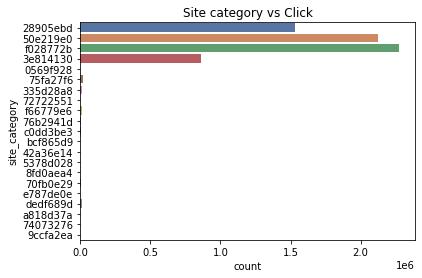

In [17]:
sns.countplot(y=df.site_category[df.click==1],palette='deep').set_title("Site category vs Click")


In [18]:
df.site_category[df.click==1].value_counts()

f028772b    2272940
50e219e0    2126350
28905ebd    1534600
3e814130     863245
75fa27f6      17915
335d28a8      12779
dedf689d      12593
f66779e6      10019
c0dd3be3       4714
70fb0e29       3298
76b2941d       3170
72722551       1626
0569f928        923
42a36e14        581
8fd0aea4        111
e787de0e         89
bcf865d9         48
5378d028         46
a818d37a         13
9ccfa2ea          4
74073276          2
Name: site_category, dtype: int64

In [19]:
df["site_domain"].unique()

array(['f3845767', '9166c161', 'bb1ef334', ..., 'e05edb43', 'd761e9fb',
       '6e5c932a'], dtype=object)

In [20]:
df.site_domain.value_counts()

c4e18dd6    15131739
f3845767     6486150
7e091613     3325008
7687a86e     1290165
98572c79      996816
              ...   
3c00002c           1
1a826628           1
fdb355ab           1
23a3116c           1
6e5c932a           1
Name: site_domain, Length: 7745, dtype: int64

## App category vs Click

<AxesSubplot:xlabel='count', ylabel='app_category'>

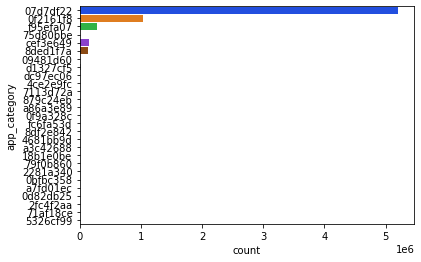

In [21]:
sns.countplot(y=df.app_category[df.click==1], palette='bright')

In [22]:
df.app_category[df.click==1].value_counts()

07d7df22    5210822
0f2161f8    1033720
f95efa07     282664
cef3e649     161450
8ded1f7a     132021
d1327cf5      15197
dc97ec06       8552
09481d60       8518
75d80bbe       3849
4ce2e9fc       2570
879c24eb       1339
fc6fa53d       1148
4681bb9d        908
0f9a328c        867
a3c42688        525
8df2e842        436
a86a3e89        325
a7fd01ec         55
79f0b860         35
2281a340         30
18b1e0be         15
0bfbc358          7
0d82db25          4
2fc4f2aa          4
7113d72a          3
71af18ce          1
5326cf99          1
Name: app_category, dtype: int64

In [23]:
df["app_domain"].unique()

array(['7801e8d9', 'd9b5648e', '2347f47a', '45a51db4', '82e27996',
       '5c5a694b', '0654b444', 'aefc06bd', '33da2e74', 'ad63ec9b',
       '5b9c592b', 'ae637522', '885c7f3f', 'b9528b13', '813f3323',
       'c6824def', 'b5f3b24a', '5c620f04', '43cf4f06', 'f2f777fb',
       '18eb4e75', 'e787a6bc', '15ec7f39', 'db829551', 'f3ad7798',
       '6f7ca2ba', 'df32afa9', 'afdf1f54', '5ac0b939', 'b8d325c3',
       '3feeed1e', 'e5d5313f', '1ed56ded', '56eabb45', '713c0c91',
       '828da833', 'b2816726', '2b627705', '1ea19ec4', '88293ffa',
       'c41aa5ee', '2d332391', 'fc41b20c', '5b3f66ff', '9acfe436',
       '90706f5d', '27ee373d', 'b0920d40', '8bb7dba9', '51174fb1',
       '2022d54e', 'f5a7c834', 'ef1fc174', 'd6feb1a4', '8d87821d',
       '99b4c806', 'd9f4700d', '47464e95', '6a0a3a9d', '47db8711',
       '48aec236', '15c23f8e', 'b408d42a', '73fc6786', '0b7d3d7d',
       '86aa8fec', 'fd5f0ee2', 'a5f9dc5b', '64ae80a5', 'a271c340',
       '4fafd4c4', 'c91cbbb4', 'af237497', '0e8616ad', 'b6c7e8

In [24]:
df.app_domain.value_counts()

7801e8d9    27237087
2347f47a     5240885
ae637522     1881838
5c5a694b     1129228
82e27996      759125
              ...   
d80e8488           1
03da86e1           1
d06cce07           1
ce2aa683           1
70146488           1
Name: app_domain, Length: 559, dtype: int64

## Device type vs click

<AxesSubplot:xlabel='device_type', ylabel='count'>

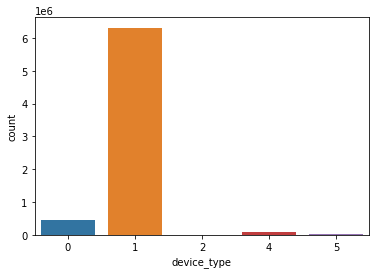

In [25]:
sns.countplot(x=df.device_type[df.click==1])

In [26]:
df.device_type[df.click==1].value_counts()

1    6311046
0     467995
4      73900
5      12123
2          2
Name: device_type, dtype: int64

## Device connection type vs Click

<AxesSubplot:xlabel='device_conn_type', ylabel='count'>

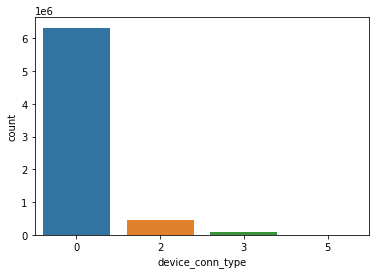

In [27]:
sns.countplot(x=df.device_conn_type[df.click==1])

## Banner position vs clicks

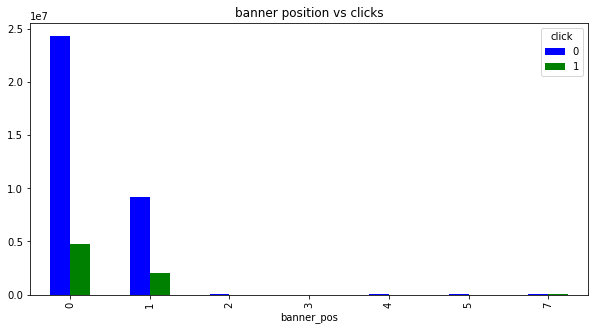

In [28]:
df.groupby(['banner_pos', 'click']).size().unstack().plot(kind='bar', figsize=(10,5), title='banner position vs clicks', color=['blue','green']);


In [29]:
df.banner_pos.value_counts()

0    29109590
1    11247282
7       43577
2       13001
4        7704
5        5778
3        2035
Name: banner_pos, dtype: int64

## Anonymized categorical variables(C1,C15,C16,C18,C21) vs Click

<AxesSubplot:title={'center':'C21 vs Click'}>

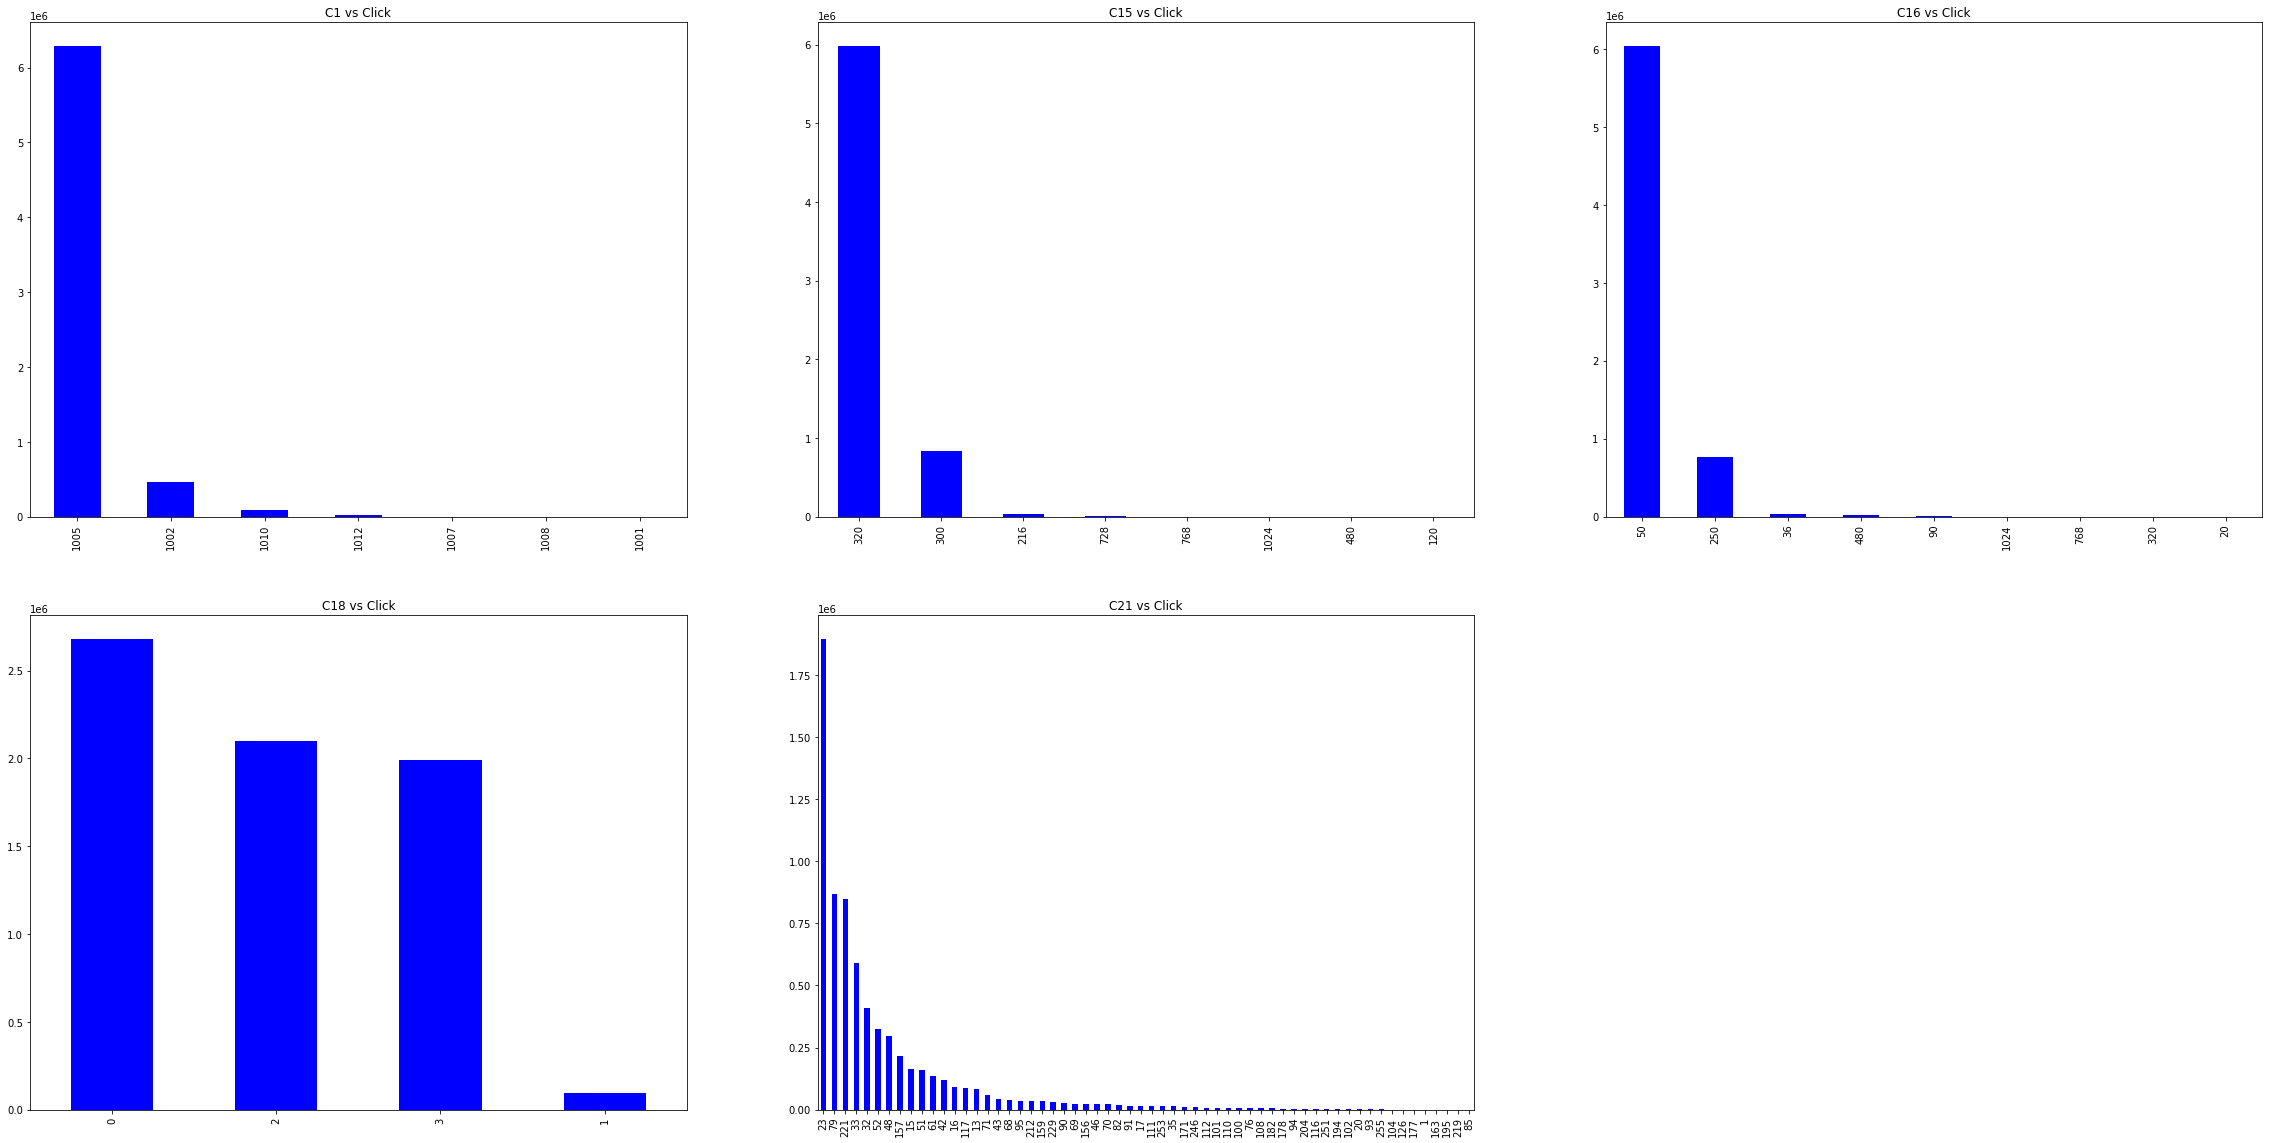

In [30]:
plt.figure(figsize=(40,20))
plt.subplot(2,3,1)
df.C1[df.click==1].value_counts().plot(kind='bar',color='blue',title='C1 vs Click')
plt.subplot(2,3,2)
df.C15[df.click==1].value_counts().plot(kind='bar',color='blue',title='C15 vs Click')
plt.subplot(2,3,3)
df.C16[df.click==1].value_counts().plot(kind='bar',color='blue',title='C16 vs Click')
plt.subplot(2,3,4)
df.C18[df.click==1].value_counts().plot(kind='bar',color='blue',title='C18 vs Click')
plt.subplot(2,3,5)
df.C21[df.click==1].value_counts().plot(kind='bar',color='blue',title='C21 vs Click')

<AxesSubplot:title={'center':'C21 vs Click'}>

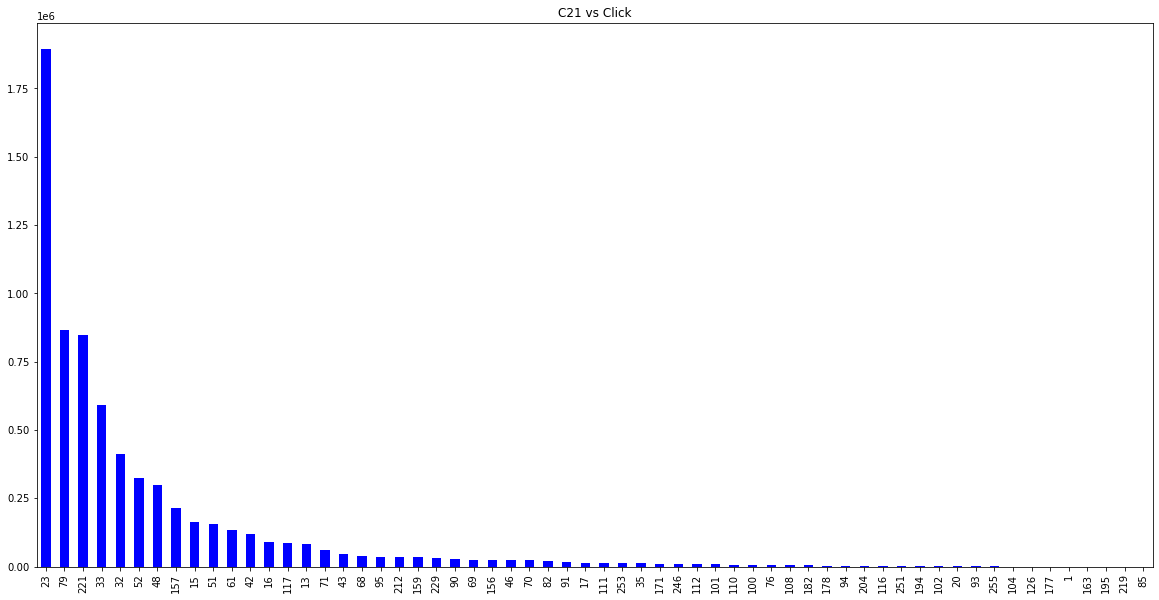

In [31]:
df.C21[df.click==1].value_counts().plot(kind='bar',color='blue',title='C21 vs Click', figsize=(20,10))

## Correlation matrix

In [32]:
corr_matrix=df.corr()

In [33]:
print (corr_matrix)

                        id     click        C1  banner_pos  device_type  \
id                1.000000 -0.000285  0.000448    0.000149     0.000486   
click            -0.000285  1.000000 -0.036855    0.025890    -0.037830   
C1                0.000448 -0.036855  1.000000    0.288329     0.894596   
banner_pos        0.000149  0.025890  0.288329    1.000000     0.323183   
device_type       0.000486 -0.037830  0.894596    0.323183     1.000000   
device_conn_type  0.000280 -0.083408  0.195931   -0.083752     0.209063   
C14               0.000266 -0.060169  0.055226   -0.012926     0.043937   
C15              -0.000187 -0.032521  0.120295    0.060286     0.178742   
C16              -0.000049  0.130007  0.062921    0.022941     0.065195   
C17               0.000251 -0.055681  0.063637   -0.032304     0.049912   
C18              -0.000105  0.021634 -0.041050    0.094986    -0.045669   
C19              -0.000080 -0.003978  0.002725    0.131640    -0.001971   
C20              -0.00006

## Heatmap using correlation matrix

<AxesSubplot:>

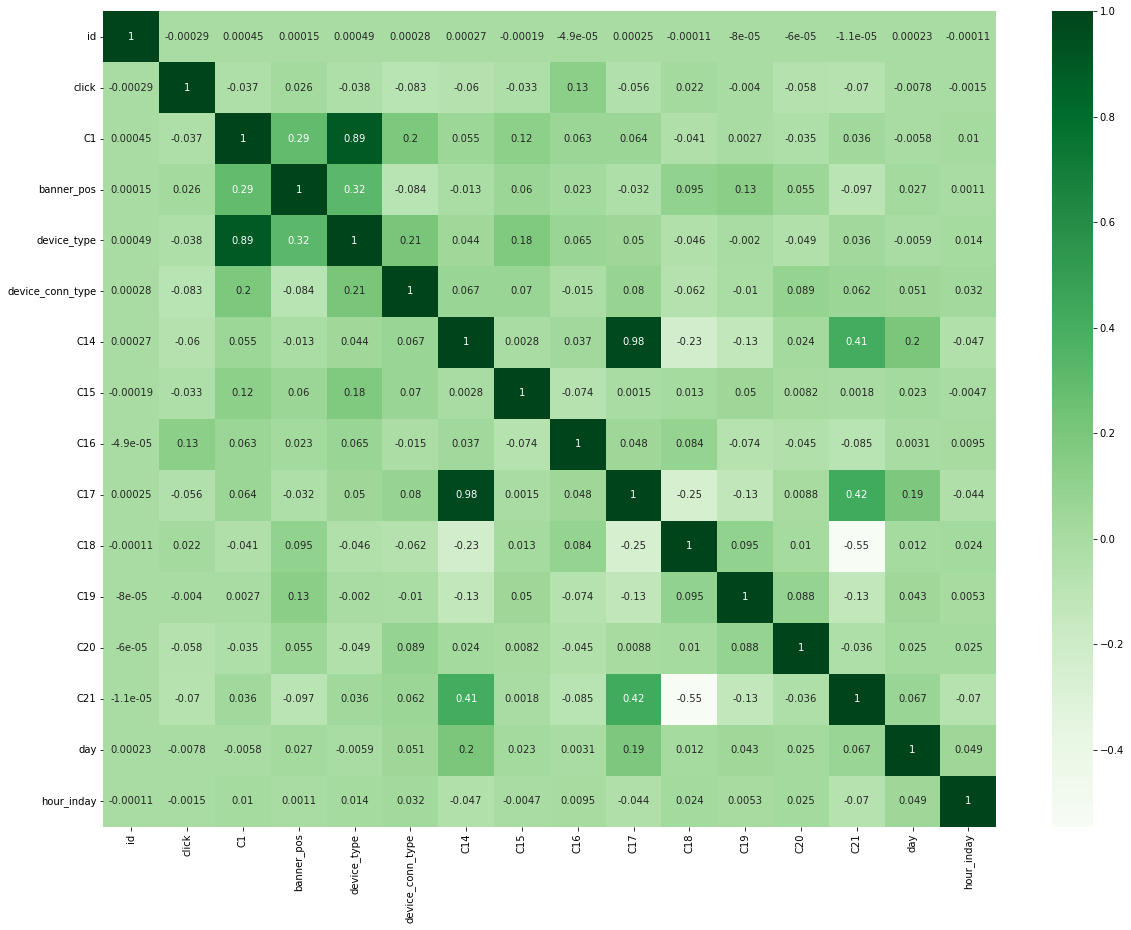

In [34]:
plt.subplots(figsize=(20,15))
sns.heatmap(corr_matrix, annot=True, cmap='Greens')

## Pairplot

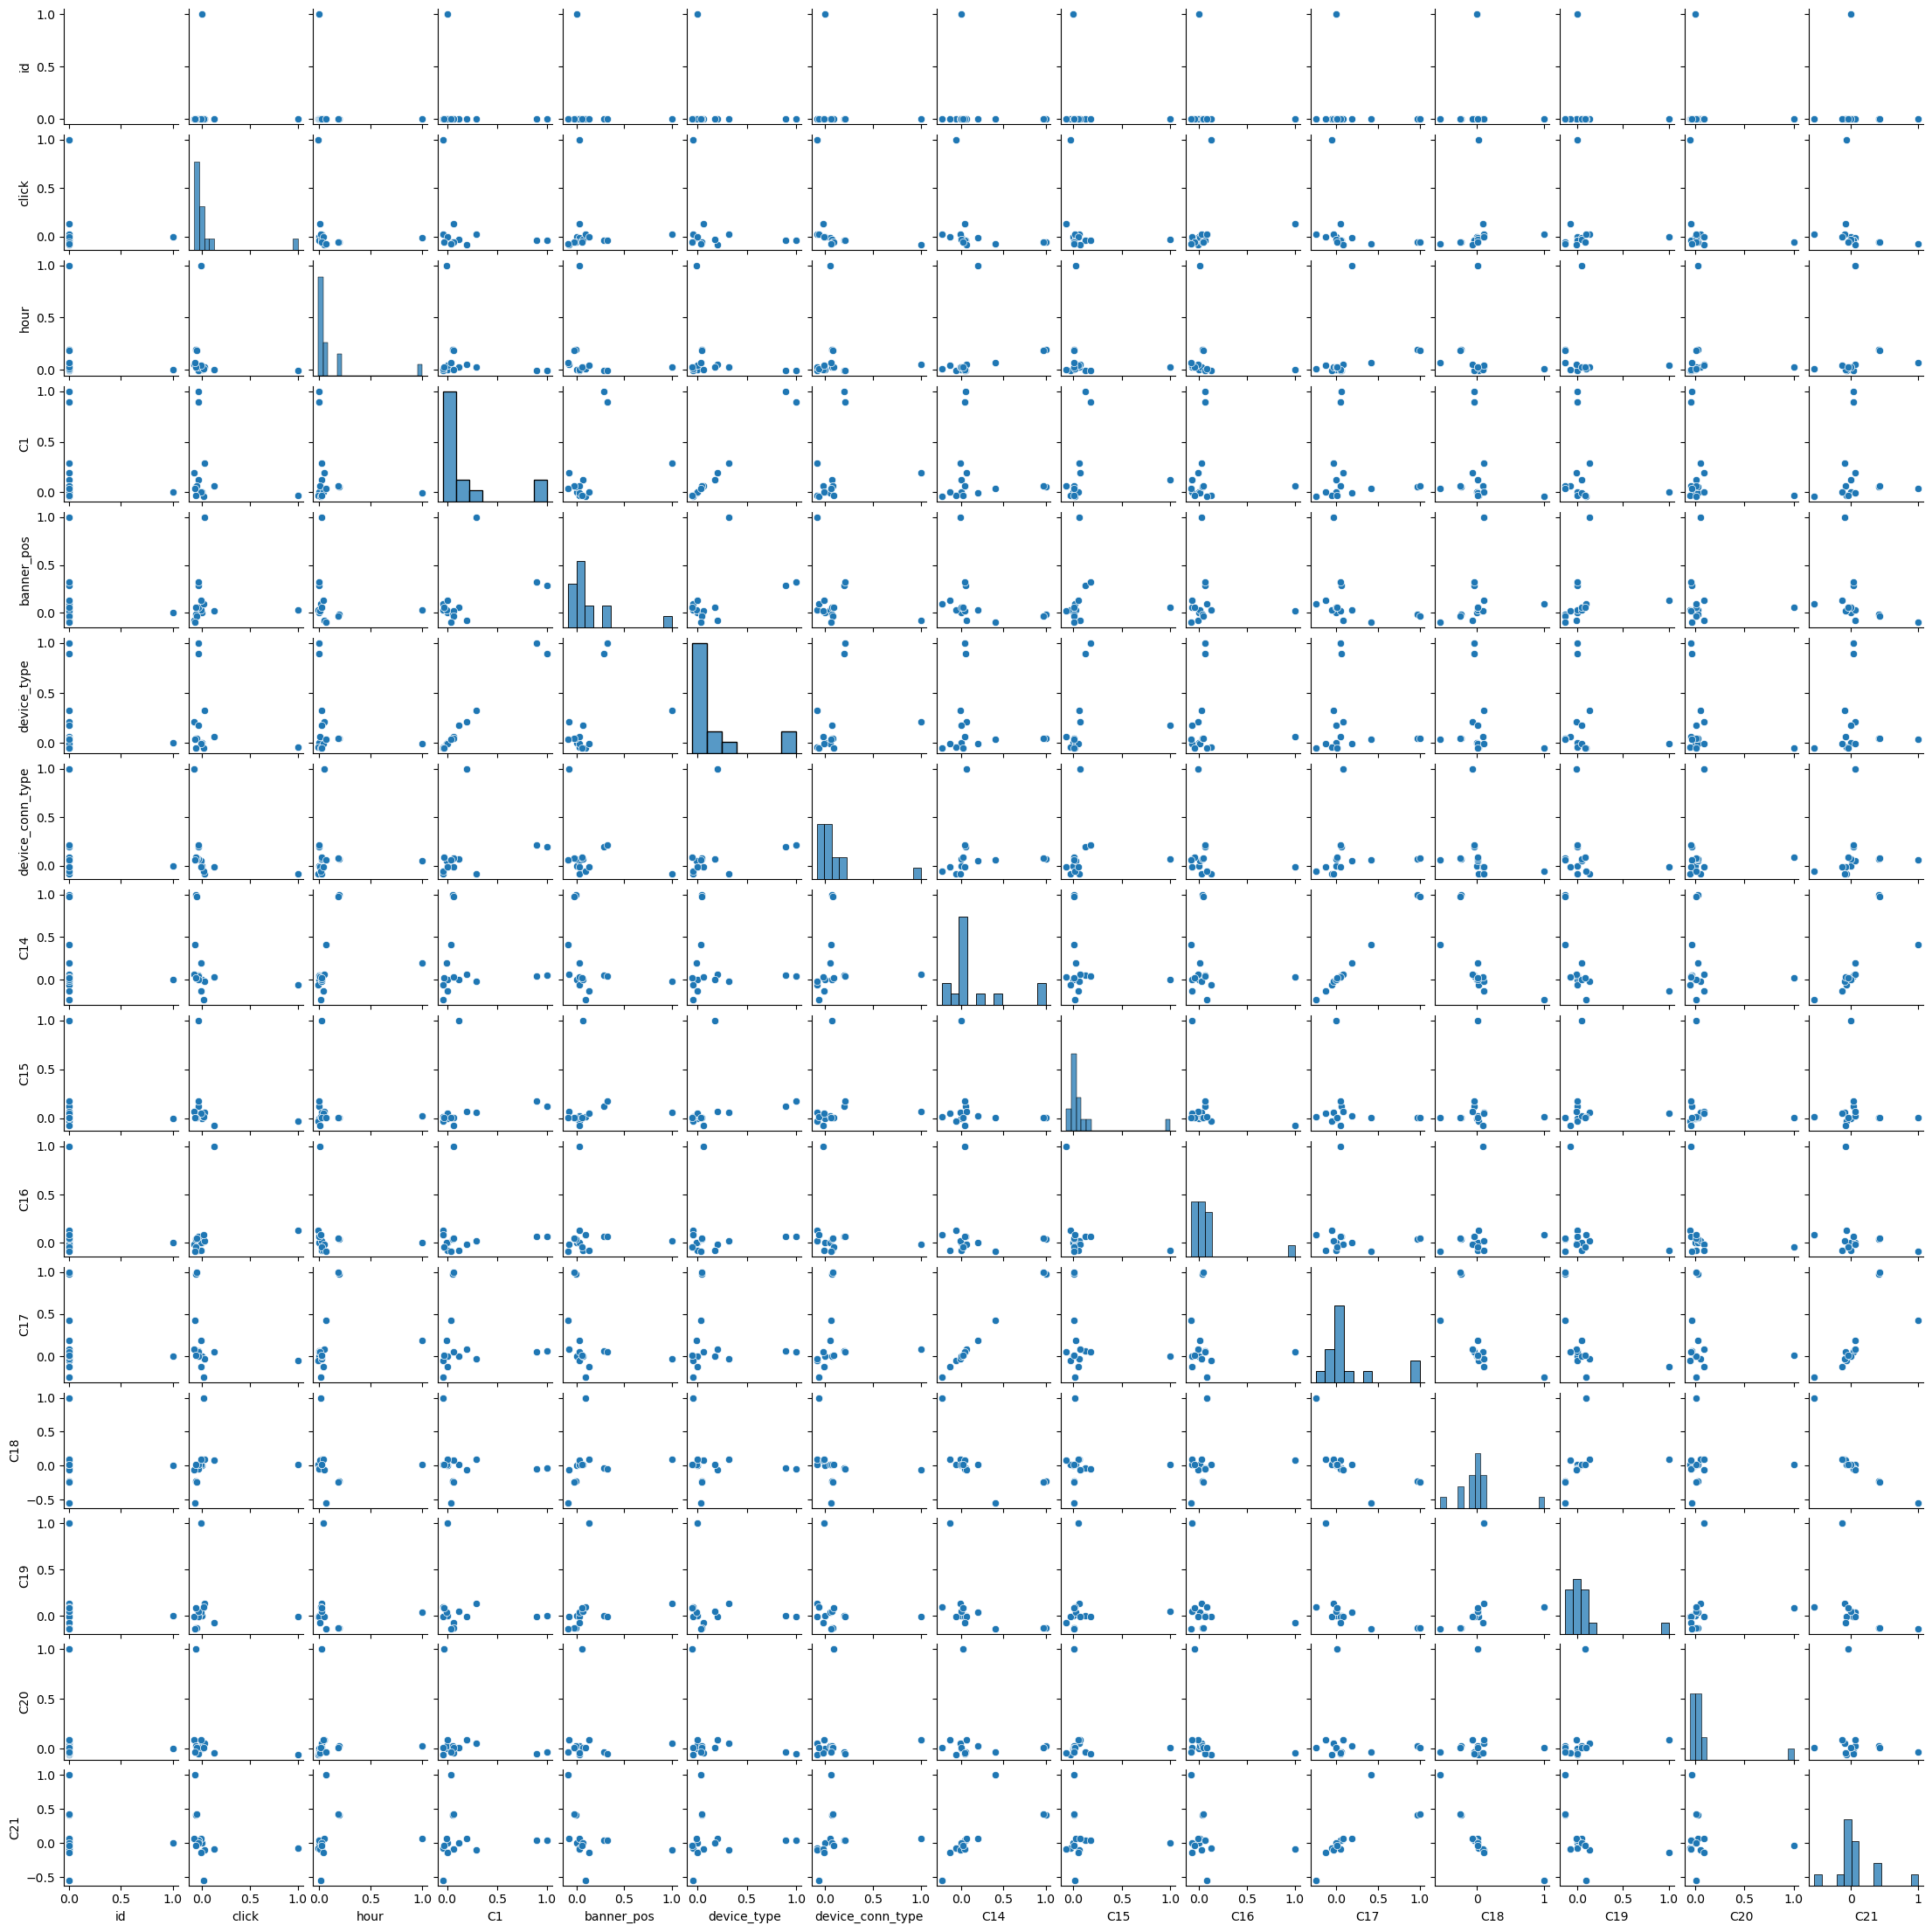

In [66]:
sns.pairplot(matrix, height=1.5)

In [35]:
df.C17[df.click==1].value_counts()

1722    855780
1994    240007
423     236460
1872    209234
2374    191030
         ...  
2744         2
2447         1
2746         1
2375         1
2585         1
Name: C17, Length: 425, dtype: int64

In [36]:
df.C19[df.click==1].value_counts()

39      2155820
35      2030102
167      509009
47       257334
1327     253404
         ...   
683          71
1447         56
545          19
1195          2
1959          1
Name: C19, Length: 67, dtype: int64

In [37]:
df.C20[df.click==1].value_counts()

-1         3651093
 100084     521672
 100148     418279
 100077     276462
 100075     253759
            ...   
 100186          4
 100246          2
 100006          2
 100134          1
 100157          1
Name: C20, Length: 166, dtype: int64

#  Sampling the entire dataset

In [2]:
from random import random,seed
seed(42)
SAMPLE_SIZE=0.012345
da=pd.read_csv('train.csv', skiprows=lambda x: random() > SAMPLE_SIZE)

In [3]:
da

,10004181428767727519,0,14102100,1005,1,0c2fe9d6,27e3c518,28905ebd,ecad2386,7801e8d9,...,1.1,0.1,6558,320,50,571,2,39,-1,32
0,10015745448500295401,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15701,320,50,1722,0,35,-1,79
1,10017994765842027302,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15707,320,50,1722,0,35,-1,79
2,10039696069275453092,0,14102100,1005,0,5b08c53b,7687a86e,3e814130,ecad2386,7801e8d9,...,1,0,17654,300,250,1994,2,39,-1,33
3,1004326673744329635,0,14102100,1005,0,543a539e,c7ca3108,3e814130,ecad2386,7801e8d9,...,1,0,20362,320,50,2333,0,39,-1,157
4,1004402950134038739,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15705,320,50,1722,0,35,-1,79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497529,9970111991550303898,0,14103023,1005,0,85f751fd,c4e18dd6,50e219e0,9c13b419,2347f47a,...,1,0,23160,320,50,2667,0,47,-1,221
497530,9971964261524117498,0,14103023,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15701,320,50,1722,0,35,-1,79
497531,997225830558183390,0,14103023,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,22676,320,50,2616,0,35,100083,51
497532,9978195739843146297,0,14103023,1005,0,85f751fd,c4e18dd6,50e219e0,7e7baafa,2347f47a,...,1,0,23866,320,50,2736,0,33,100170,246


In [4]:
da.columns

Index(['10004181428767727519', '0', '14102100', '1005', '1', '0c2fe9d6',
       '27e3c518', '28905ebd', 'ecad2386', '7801e8d9', '07d7df22', 'a99f214a',
       'b7a69808', '158e4944', '1.1', '0.1', '6558', '320', '50', '571', '2',
       '39', '-1', '32'],
      dtype='object')

In [5]:
da.columns = ['id', 'click', 'hour', 'C1', 'banner_pos', 'site_id', 'site_domain',
       'site_category', 'app_id', 'app_domain', 'app_category', 'device_id',
       'device_ip', 'device_model', 'device_type', 'device_conn_type', 'C14',
       'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21']

In [6]:
da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497534 entries, 0 to 497533
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                497534 non-null  uint64
 1   click             497534 non-null  int64 
 2   hour              497534 non-null  int64 
 3   C1                497534 non-null  int64 
 4   banner_pos        497534 non-null  int64 
 5   site_id           497534 non-null  object
 6   site_domain       497534 non-null  object
 7   site_category     497534 non-null  object
 8   app_id            497534 non-null  object
 9   app_domain        497534 non-null  object
 10  app_category      497534 non-null  object
 11  device_id         497534 non-null  object
 12  device_ip         497534 non-null  object
 13  device_model      497534 non-null  object
 14  device_type       497534 non-null  int64 
 15  device_conn_type  497534 non-null  int64 
 16  C14               497534 non-null  int

In [7]:
da.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,10015745448500295401,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15701,320,50,1722,0,35,-1,79
1,10017994765842027302,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15707,320,50,1722,0,35,-1,79
2,10039696069275453092,0,14102100,1005,0,5b08c53b,7687a86e,3e814130,ecad2386,7801e8d9,...,1,0,17654,300,250,1994,2,39,-1,33
3,1004326673744329635,0,14102100,1005,0,543a539e,c7ca3108,3e814130,ecad2386,7801e8d9,...,1,0,20362,320,50,2333,0,39,-1,157
4,1004402950134038739,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15705,320,50,1722,0,35,-1,79


# Pre-processing

In [114]:
X = da.drop(columns = ['click','site_domain','C20','C14'])
y = da['click']

In [115]:
X

,id,hour,C1,banner_pos,site_id,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,C15,C16,C17,C18,C19,C21
0,10015745448500295401,14102100,1005,0,1fbe01fe,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,6b9769f2,4c8aeb60,1,0,320,50,1722,0,35,79
1,10017994765842027302,14102100,1005,0,1fbe01fe,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,8ce11055,158e4944,1,0,320,50,1722,0,35,79
2,10039696069275453092,14102100,1005,0,5b08c53b,3e814130,ecad2386,7801e8d9,07d7df22,a99f214a,b76420b1,16954458,1,0,300,250,1994,2,39,33
3,1004326673744329635,14102100,1005,0,543a539e,3e814130,ecad2386,7801e8d9,07d7df22,a99f214a,592dcc7c,d787e91b,1,0,320,50,2333,0,39,157
4,1004402950134038739,14102100,1005,0,1fbe01fe,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,488a9a3e,711ee120,1,0,320,50,1722,0,35,79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497529,9970111991550303898,14103023,1005,0,85f751fd,50e219e0,9c13b419,2347f47a,f95efa07,a99f214a,8d808d84,711ee120,1,0,320,50,2667,0,47,221
497530,9971964261524117498,14103023,1005,0,1fbe01fe,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,2e5efb77,8a4875bd,1,0,320,50,1722,0,35,79
497531,997225830558183390,14103023,1005,0,1fbe01fe,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,583d762a,24f6b932,1,0,320,50,2616,0,35,51
497532,9978195739843146297,14103023,1005,0,85f751fd,50e219e0,7e7baafa,2347f47a,0f2161f8,a99f214a,72c6ebbb,365e64e3,1,0,320,50,2736,0,33,246


In [116]:
y

0         0
1         0
2         0
3         0
4         0
         ..
497529    0
497530    0
497531    0
497532    0
497533    0
Name: click, Length: 497534, dtype: int64

In [117]:
X.columns = ['id', 'hour', 'C1', 'banner_pos', 'site_id','site_category', 'app_id', 'app_domain', 'app_category', 'device_id',
       'device_ip', 'device_model', 'device_type', 'device_conn_type', 
       'C15', 'C16', 'C17', 'C18', 'C19', 'C21']
y.columns = ['click']

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2022)

In [119]:
num_vars = X.select_dtypes(exclude='object').columns
cat_vars = X.select_dtypes(include='object').columns

In [120]:
pipeline = Pipeline([('si',SimpleImputer(strategy='median')),('std',StandardScaler())])

In [121]:
encoder = ce.LeaveOneOutEncoder(return_df=True)
encoder.fit_transform(X_train[cat_vars], y_train)

,site_id,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model
416955,0.118676,0.128107,0.096774,0.137589,0.107822,0.173962,0.169466,0.066372
178611,0.118676,0.128107,0.190255,0.190310,0.107822,0.169466,0.169466,0.156863
228685,0.118676,0.128107,0.020908,0.025073,0.107822,0.173962,0.000000,0.017324
460561,0.205431,0.207211,0.198195,0.194486,0.198797,0.173962,0.166667,0.139461
468136,0.226601,0.286907,0.198195,0.194486,0.198797,0.173962,0.169466,0.220832
...,...,...,...,...,...,...,...,...
439985,0.098039,0.178302,0.198195,0.194486,0.198797,0.173962,0.107311,0.089686
103024,0.118676,0.128107,0.186658,0.181861,0.095038,0.169466,0.000000,0.193849
147629,0.279920,0.178294,0.198191,0.194482,0.198793,0.173959,0.169466,0.135950
263388,0.118676,0.128107,0.020908,0.025073,0.107822,0.173962,0.000000,0.017324


In [122]:
preprocessing_pipeline = ColumnTransformer([('num',pipeline,num_vars),('cat',encoder,cat_vars)])

In [123]:
X_train_std=pd.DataFrame(preprocessing_pipeline.fit_transform(X_train,y_train))

In [124]:
X_test_std=pd.DataFrame(preprocessing_pipeline.fit_transform(X_test,y_test))

In [125]:
X_train_std.shape

(398027, 20)

In [126]:
X_test_std.shape

(99507, 20)

In [127]:
y_test.shape

(99507,)

In [128]:
X_train_std

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.381797,1.181028,0.027843,-0.566348,-0.031005,1.943800,0.053593,-0.21406,0.977541,1.178455,-0.548863,-0.857252,0.118676,0.128107,0.096774,0.137589,0.107822,0.173962,0.169466,0.066372
1,-1.253900,-0.507786,0.027843,-0.566348,-0.031005,-0.388469,0.053593,-0.21406,0.189131,-1.083422,1.282233,-0.501327,0.118676,0.128107,0.190255,0.190310,0.107822,0.169466,0.169466,0.156863
2,-0.791462,-0.150472,0.027843,-0.566348,-0.031005,1.943800,0.053593,-0.21406,0.511365,-0.329463,-0.190605,-0.173876,0.118676,0.128107,0.020908,0.025073,0.107822,0.173962,0.000000,0.017324
3,-1.455621,1.511375,0.027843,-0.566348,-0.031005,1.943800,0.053593,-0.21406,0.674936,-1.083422,-0.173545,1.961674,0.205431,0.207211,0.198195,0.194486,0.198797,0.173962,0.166667,0.139461
4,-0.790061,1.521487,0.027843,-0.566348,-0.031005,-0.388469,0.053593,-0.21406,0.990627,0.424496,-0.514743,-0.857252,0.226601,0.286907,0.198195,0.194486,0.198797,0.173962,0.169466,0.220832
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398022,-1.339957,1.214737,0.027843,1.396915,-0.031005,-0.388469,0.053593,-0.21406,0.974270,1.178455,2.015809,-0.316246,0.098039,0.178302,0.198195,0.194486,0.198797,0.173962,0.107311,0.089686
398023,-0.105997,-1.154996,0.027843,-0.566348,-0.031005,-0.388469,0.053593,-0.21406,-3.162430,1.178455,3.124703,-0.971148,0.118676,0.128107,0.186658,0.181861,0.095038,0.169466,0.000000,0.193849
398024,0.077033,-0.824649,0.027843,1.396915,-0.031005,-0.388469,0.053593,-0.21406,-0.084032,1.178455,-0.537490,-0.857252,0.279920,0.178294,0.198191,0.194482,0.198793,0.173959,0.169466,0.135950
398025,-0.671150,0.169762,0.027843,-0.566348,-0.031005,3.109935,0.053593,-0.21406,0.511365,-0.329463,-0.190605,-0.173876,0.118676,0.128107,0.020908,0.025073,0.107822,0.173962,0.000000,0.017324


# Feature Selection-Filter Methods

# ANOVA

In [28]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
selector = SelectKBest(f_classif, k=22)
selector.fit(X_train_std, y_train)

SelectKBest(k=22)

In [29]:
cols = selector.get_support(indices=True)
cols

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22], dtype=int64)

In [30]:
x_train_s = X_train.iloc[:,[  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22]]
x_test_s = X_test.iloc[:,[  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22]]

In [31]:
x_train_s

,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
416955,14102909,1005,0,85f751fd,c4e18dd6,50e219e0,431a0d44,2347f47a,0f2161f8,a99f214a,...,1,2,23642,320,50,2709,3,35,-1,23
178611,14102408,1005,0,85f751fd,c4e18dd6,50e219e0,e2fcccd2,5c5a694b,0f2161f8,e985c59c,...,1,0,19771,320,50,2227,0,679,100075,48
228685,14102514,1005,0,85f751fd,c4e18dd6,50e219e0,92f5800b,ae637522,0f2161f8,a99f214a,...,1,2,21191,320,50,2424,1,161,100191,71
460561,14103007,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,...,1,2,23107,320,50,2524,0,167,-1,221
468136,14103010,1005,0,d8bb8687,98e6755b,3e814130,ecad2386,7801e8d9,07d7df22,a99f214a,...,1,0,23729,320,50,2717,2,47,-1,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439985,14102919,1005,1,ce3307ec,7e091613,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,...,1,0,23626,320,50,2707,3,937,100156,61
103024,14102216,1005,0,85f751fd,c4e18dd6,50e219e0,7358e05e,b9528b13,cef3e649,99145f53,...,1,0,1039,320,50,178,3,1327,100148,15
147629,14102314,1005,1,d9750ee7,98572c79,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,...,1,0,18092,320,50,2060,3,39,-1,23
263388,14102609,1005,0,85f751fd,c4e18dd6,50e219e0,92f5800b,ae637522,0f2161f8,a99f214a,...,1,3,21189,320,50,2424,1,161,100190,71


# Logistic Regression

In [1]:
import pandas as pd
import numpy as np
from statsmodels.formula.api import ols,glm
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, ElasticNet
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor, SGDClassifier
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
import statsmodels.api as sm
import category_encoders as ce
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")

In [157]:
lr = LogisticRegression(random_state=2022)

In [158]:
penalty = ['l1', 'l2','elasticnet']
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

In [159]:
parameter_lr = dict(penalty=penalty, solver=solver)

In [160]:
parameter_lr

{'penalty': ['l1', 'l2', 'elasticnet'],
 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

In [161]:
lr_random = RandomizedSearchCV( estimator = lr, param_distributions = parameter_lr, n_iter=20, n_jobs=-1,random_state=2022)

In [164]:
lr_random.best_estimator_

LogisticRegression(random_state=2022, solver='saga')

In [163]:
lr_random.fit(X_train_std, y_train)

RandomizedSearchCV(estimator=LogisticRegression(random_state=2022), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   random_state=2022)

In [165]:
y_pred=lr_random.predict(X_test_std)

In [166]:
pd.crosstab(y_test,lr_random.predict(X_test_std))

col_0,0,1
click,,
0,81706,1023
1,15733,1045


In [167]:
from sklearn.metrics import accuracy_score

In [168]:
accuracy_score(y_pred,y_test)

0.831609836493915

In [173]:
recall_score(y_test,y_pred)

0.06228394325902968

In [172]:
precision_score(y_test,y_pred)

0.5053191489361702

In [171]:
print(metrics.classification_report(y_test,lr_random.predict(X_test_std)))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91     82729
           1       0.51      0.06      0.11     16778

    accuracy                           0.83     99507
   macro avg       0.67      0.52      0.51     99507
weighted avg       0.78      0.83      0.77     99507



In [52]:
n_x_train_std=X_train_std.drop(0, axis=1)

In [53]:
n_x_test_std=X_test_std.drop(0, axis=1)

In [56]:
lr_random.fit(n_x_train_std, y_train)

RandomizedSearchCV(estimator=LogisticRegression(random_state=2022), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   random_state=2022)

In [59]:
y_pred=lr_random.predict(n_x_test_std)

In [61]:
pd.crosstab(y_test,lr_random.predict(n_x_test_std))

col_0,0,1
click,,
0,81757,972
1,15745,1033


In [63]:
accuracy_score(y_pred,y_test)

0.8320017687197886

# Random Forest

In [175]:
rf = RandomForestClassifier(oob_score=True,random_state=2022)

In [176]:
n_estimators = [20,30,40,50]
criterion = ['gini','entropy']
min_samples_split = [30,35,40]
min_samples_leaf = [15,20,25]
max_features = ['sqrt','log2']

In [177]:
param_rf = dict(n_estimators=n_estimators,criterion=criterion,min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf,max_features=max_features)

In [178]:
param_rf

{'n_estimators': [20, 30, 40, 50],
 'criterion': ['gini', 'entropy'],
 'min_samples_split': [30, 35, 40],
 'min_samples_leaf': [15, 20, 25],
 'max_features': ['sqrt', 'log2']}

In [179]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions=param_rf,n_iter=20,n_jobs=-1,random_state=2022)

In [180]:
forest=rf_random.fit(X_train_std, y_train)

In [181]:
fm_f=forest.best_estimator_

In [182]:
y_pred=forest.predict(X_test_std)

In [183]:
pd.crosstab(y_test,y_pred)

col_0,0,1
click,,
0,32031,50698
1,4228,12550


In [185]:
accuracy_score(y_test,y_pred)

0.4480187323504879

In [186]:
recall_score(y_test,y_pred)

0.7480033377041364

In [187]:
precision_score(y_test,y_pred)

0.19842524664811537

In [125]:
print(metrics.classification_report(y_test,rf_random.predict(X_test_std)))

              precision    recall  f1-score   support

           0       0.88      0.38      0.53     82729
           1       0.20      0.75      0.31     16778

    accuracy                           0.44     99507
   macro avg       0.54      0.56      0.42     99507
weighted avg       0.77      0.44      0.49     99507



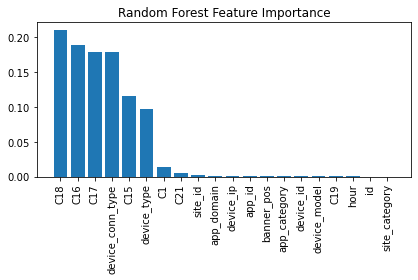

In [205]:
import matplotlib.pyplot as plt
importances=fm_f.feature_importances_
sorted_indices = np.argsort(importances)[::-1]
 
feat_labels = da.columns[1:]
 
plt.title('Random Forest Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

# XGBoost

In [141]:
from xgboost import XGBClassifier

In [142]:
xgb = XGBClassifier()

In [143]:
gbm_param = {
    
    'xgb__n_estimators' : [10,20,30,40,50],
    
    'xgb__max_depth' : [3,4,5],
    
    'xgb__learning_rate' : [.1,.2,.8,1,10],
    
    'xgb__gamma' : [.02,.03,.04, .05,.8],
    
    'xgb__colsample_bytree' : [.4,.5,.7]
    
}

In [144]:
rscv_gbm = RandomizedSearchCV(estimator=xgb,scoring='neg_mean_squared_error',param_distributions=gbm_param,cv=5,n_jobs=-1,n_iter=30)

In [145]:
rscv_gbm.fit(X_train_std, y_train)

[14:40:50] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "xgb__colsample_bytree", "xgb__gamma", "xgb__learning_rate", "xgb__max_depth", "xgb__n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None,...
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=Non

In [146]:
fm_xg=rscv_gbm.best_estimator_

In [147]:
y_predi=fm_xg.predict(X_test_std)

In [148]:
y_predi

array([1, 1, 1, ..., 0, 1, 1])

In [149]:
pd.crosstab(y_test,y_predi)

col_0,0,1
click,,
0,14825,67904
1,2601,14177


In [190]:
accuracy_score(y_test,y_predi)

0.29145688243038176

In [189]:
recall_score(y_test,y_predi)

0.8449755632375731

In [188]:
precision_score(y_test,y_predi)

0.17271963060878887

In [151]:
print(metrics.classification_report(y_test,rscv_gbm.predict(X_test_std)))

              precision    recall  f1-score   support

           0       0.85      0.18      0.30     82729
           1       0.17      0.84      0.29     16778

    accuracy                           0.29     99507
   macro avg       0.51      0.51      0.29     99507
weighted avg       0.74      0.29      0.29     99507



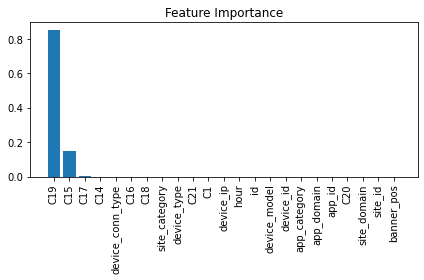

In [81]:
import matplotlib.pyplot as plt
importances=fm_xg.feature_importances_
sorted_indices = np.argsort(importances)[::-1]
 
feat_labels = da.columns[1:]
 
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

# Light gbm

In [129]:
import lightgbm as lgb

In [28]:
!pip install lightgbm

In [33]:
lgb_param = {
    
    'n_estimators' : [10,20,30,40,50],
    
    'max_depth' : [3,4,5],
    
    'learning_rate' : [.1,.2,.8,1,10],
    
    'gamma' : [.02,.03,.04, .05,.8],
    
    'colsample_bytree' : [.4,.5,.7]
    
}

In [34]:
model = lgb.LGBMClassifier()
l_gb = RandomizedSearchCV(estimator=model,scoring='neg_mean_squared_error',param_distributions=lgb_param,cv=5,n_jobs=-1,n_iter=30)

In [130]:
l_gb.fit(X_train_std,y_train,eval_set=[(X_test_std,y_test),(X_train_std,y_train)],
          verbose=20,eval_metric='logloss')

[LightGBM] [Warning] Unknown parameter: gamma
[20]	training's binary_logloss: 0.00700838	valid_0's binary_logloss: 1.47842


RandomizedSearchCV(cv=5, estimator=LGBMClassifier(), n_iter=30, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.4, 0.5, 0.7],
                                        'gamma': [0.02, 0.03, 0.04, 0.05, 0.8],
                                        'learning_rate': [0.1, 0.2, 0.8, 1, 10],
                                        'max_depth': [3, 4, 5],
                                        'n_estimators': [10, 20, 30, 40, 50]},
                   scoring='neg_mean_squared_error')

In [131]:
fm_lg=l_gb.best_estimator_

In [132]:
y_predi=fm_lg.predict(X_test_std)

In [133]:
y_predi

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [134]:
recall_score(y_test,fm_lg.predict(X_test_std))

0.7078316843485517

In [135]:
accuracy_score(y_test,fm_lg.predict(X_test_std))

0.4372858190881044

In [191]:
precision_score(y_test,fm_lg.predict(X_test_std))

0.18860373523059332

In [136]:
print(metrics.classification_report(y_test,fm_lg.predict(X_test_std)))

              precision    recall  f1-score   support

           0       0.87      0.38      0.53     82729
           1       0.19      0.71      0.30     16778

    accuracy                           0.44     99507
   macro avg       0.53      0.55      0.41     99507
weighted avg       0.75      0.44      0.49     99507



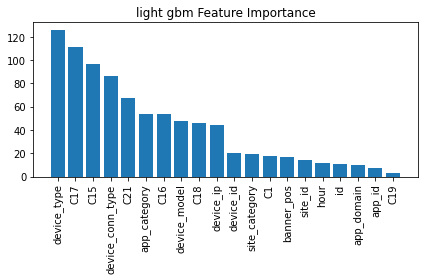

In [206]:
import matplotlib.pyplot as plt
importances=fm_lg.feature_importances_
sorted_indices = np.argsort(importances)[::-1]
 
feat_labels = da.columns[1:]
 
plt.title('light gbm Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

In [138]:
import sklearn.metrics as metrics

In [139]:
from sklearn.metrics import plot_confusion_matrix

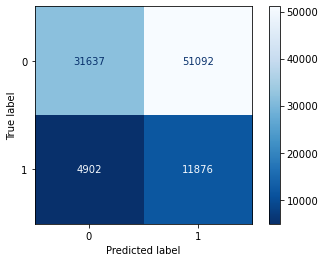

In [140]:
metrics.plot_confusion_matrix(fm_lg,X_test_std,y_test,cmap='Blues_r')

In [113]:
pd.crosstab(y_test,y_predi)

col_0,0,1
click,,
0,35093,47636
1,5114,11664


# Naive Bayes Classifier

In [192]:
from sklearn.inspection import permutation_importance

In [193]:
from sklearn.model_selection import RepeatedStratifiedKFold

In [194]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [195]:
fm_gn=gnb.fit(X_train_std, y_train)

In [196]:
print('Training accuracy {:.4f}'.format(gnb.score(X_train_std,y_train)))
print('Testing accuracy {:.4f}'.format(gnb.score(X_test_std,y_test)))

Training accuracy 0.7535
Testing accuracy 0.7632


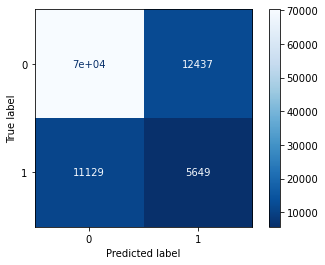

In [197]:
metrics.plot_confusion_matrix(gnb,X_test_std,y_test,cmap='Blues_r')

In [198]:
y_predi=gnb.predict(X_test_std)

In [199]:
pd.crosstab(y_test,y_predi)

col_0,0,1
click,,
0,70292,12437
1,11129,5649


In [200]:
imps = permutation_importance(fm_gn, X_test_std, y_test)
imps.importances_mean

array([-6.83369009e-05, -1.34663893e-04, -1.76068015e-03, -4.38160129e-03,
       -2.51640588e-03, -5.50514034e-03, -6.63269921e-05,  1.60209834e-02,
       -1.08535078e-03, -2.45007889e-03, -2.83799130e-03, -6.57240194e-03,
        7.34420694e-03, -7.53514828e-03, -5.69608168e-03, -1.19046901e-02,
       -1.27106636e-02,  1.54561991e-03, -8.52201353e-04, -5.14938648e-03])

In [201]:
accuracy_score(y_test,y_predi)

0.7631724401298401

In [154]:
from sklearn.metrics import recall_score, precision_score

In [202]:
recall_score(y_test,y_predi)

0.33669090475622837

In [203]:
precision_score(y_test,y_predi)

0.3123410372663939

In [108]:
print(metrics.classification_report(y_test,gnb.predict(X_test_std)))

              precision    recall  f1-score   support

           0       0.86      0.85      0.86     82729
           1       0.32      0.35      0.33     16778

    accuracy                           0.76     99507
   macro avg       0.59      0.60      0.59     99507
weighted avg       0.77      0.76      0.77     99507



# lesser datset size

In [34]:
from random import random,seed
seed(42)
SAMPLE_SIZE=0.005
ds=pd.read_csv('train.csv', skiprows=lambda x: random() > SAMPLE_SIZE)

In [35]:
ds

,10017994765842027302,0,14102100,1005,0.1,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0.2,15707,320,50,1722,0.3,35,-1,79
0,1004326673744329635,0,14102100,1005,0,543a539e,c7ca3108,3e814130,ecad2386,7801e8d9,...,1,0,20362,320,50,2333,0,39,-1,157
1,10055436384941915005,0,14102100,1005,0,85f751fd,c4e18dd6,50e219e0,03528b27,2347f47a,...,1,2,15705,320,50,1722,0,35,100083,79
2,10058856496220336790,1,14102100,1005,0,85f751fd,c4e18dd6,50e219e0,98fed791,d9b5648e,...,1,0,20984,320,50,2371,0,551,100215,46
3,10097670341326082106,0,14102100,1005,0,85f751fd,c4e18dd6,50e219e0,febd1138,82e27996,...,1,0,21611,320,50,2480,3,297,100111,61
4,10147299217343620697,1,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15708,320,50,1722,0,35,-1,79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201938,9859910601758249651,0,14103023,1005,0,85f751fd,c4e18dd6,50e219e0,3aa4245a,2347f47a,...,1,0,375,320,50,112,3,1319,-1,15
201939,9874156333835341609,0,14103023,1005,0,85f751fd,c4e18dd6,50e219e0,685d1c4c,2347f47a,...,1,3,23642,320,50,2709,3,39,100221,23
201940,9971964261524117498,0,14103023,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15701,320,50,1722,0,35,-1,79
201941,9978195739843146297,0,14103023,1005,0,85f751fd,c4e18dd6,50e219e0,7e7baafa,2347f47a,...,1,0,23866,320,50,2736,0,33,100170,246


In [47]:
ds.columns = ['id', 'click', 'hour', 'C1', 'banner_pos', 'site_id', 'site_domain',
       'site_category', 'app_id', 'app_domain', 'app_category', 'device_id',
       'device_ip', 'device_model', 'device_type', 'device_conn_type', 'C14',
       'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21']

In [48]:
X = ds.drop(columns = 'click')
y = ds['click']

In [49]:
X.columns = ['id', 'hour', 'C1', 'banner_pos', 'site_id', 'site_domain',
       'site_category', 'app_id', 'app_domain', 'app_category', 'device_id',
       'device_ip', 'device_model', 'device_type', 'device_conn_type', 'C14',
       'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21']
y.columns = ['click']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2022)

In [51]:
num_vars = X.select_dtypes(exclude='object').columns
cat_vars = X.select_dtypes(include='object').columns

In [52]:
pipeline = Pipeline([('si',SimpleImputer(strategy='median')),('std',StandardScaler())])

In [53]:
encoder = ce.LeaveOneOutEncoder(return_df=True)
encoder.fit_transform(X_train[cat_vars], y_train)

,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model
120463,0.090000,0.090000,0.179939,0.199128,0.195173,0.199625,0.174371,0.169844,0.141994
100356,0.118017,0.121983,0.127672,0.057239,0.023465,0.095314,0.174371,0.169844,0.047337
104373,0.281919,0.276457,0.179939,0.199128,0.195173,0.199625,0.174371,0.169844,0.271953
140690,0.078402,0.078402,0.209955,0.199128,0.195173,0.199625,0.174371,0.169844,0.176692
75869,0.118017,0.121983,0.127672,0.050790,0.195173,0.108028,0.169844,0.169844,0.119835
...,...,...,...,...,...,...,...,...,...
177841,0.208162,0.208162,0.209955,0.199128,0.195173,0.199625,0.174371,0.147059,0.176849
103024,0.222222,0.222222,0.281442,0.199118,0.195164,0.199615,0.174364,0.111111,0.201990
147629,0.288136,0.327014,0.281524,0.199128,0.195173,0.199625,0.174371,0.000000,0.156977
1244,0.208162,0.208162,0.209955,0.199128,0.195173,0.199625,0.174371,0.240283,0.135013


In [54]:
preprocessing_pipeline = ColumnTransformer([('num',pipeline,num_vars),('cat',encoder,cat_vars)])

In [55]:
X_train_std=pd.DataFrame(preprocessing_pipeline.fit_transform(X_train,y_train))

In [56]:
X_test_std=pd.DataFrame(preprocessing_pipeline.fit_transform(X_test,y_test))

In [57]:
X_train_std.shape

(161554, 23)

In [62]:
y_train.shape

(161554,)

# K Nearest Neighbour

In [58]:
from sklearn.neighbors import KNeighborsClassifier

In [59]:
knn = KNeighborsClassifier()

In [60]:
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

In [61]:
knn_=RandomizedSearchCV(knn, hyperparameters, cv=10)

In [ ]:
fm_knn=knn_.fit(X_train_std, y_train)

# linear SVM

In [25]:
from sklearn.svm import SVC
model=SVC()

In [26]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','linear','sigmoid','poly'],
              'degree': [1,2,3]}

In [27]:
_svm = RandomizedSearchCV(estimator=model,scoring='neg_mean_squared_error',param_distributions=param_grid,refit=True,cv=5,n_jobs=-1,n_iter=30)

In [ ]:
_svm.fit(X_train_std, y_train)